In [17]:
import torch
from model import UNET
import albumentations as A
from albumentations.pytorch import ToTensorV2
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [18]:
checkpoint = torch.load('my_checkpoint.pth.tar')

model = UNET(in_channels=3, out_channels=1).to('mps')

model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [27]:
path_pic = os.listdir('data/train_image')[0]

path_pic = os.path.join('data/train_image', path_pic)

img = Image.open(path_pic)

img = np.array(img)

In [28]:
transform = A.Compose([
    A.Resize(height=160, width=240),
    A.Normalize(
        mean=[0.0, 0.0, 0.0],
        std=[1.0, 1.0, 1.0],
        max_pixel_value=255.0
    ),
    ToTensorV2(),
])


img_process = transform(image=img)['image']

In [29]:

with torch.no_grad():
    model.eval()
    img_process = img_process.unsqueeze(0)
    img_process = img_process.to('mps')
    preds = torch.sigmoid(model(img_process))
    preds = (preds > 0.5).float()
    preds = preds.squeeze(0).squeeze(0)
    preds = preds.cpu().numpy()

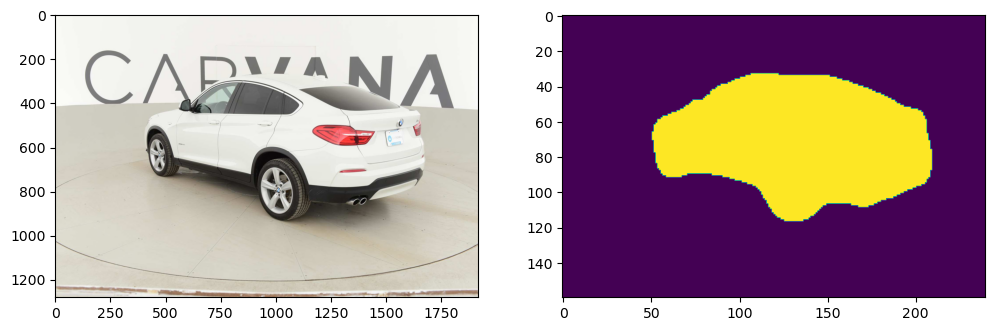

In [30]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(preds)